In [2]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")


In [3]:
# Exercise 1
# Number of rows of the dataframe
len(df)


891

In [3]:
# Exercise 2
# List all attributes of the dataset
print(df.columns.tolist())
print(df.info())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
# Exercise 3
# Age of youngest passenger
df['Age'].min(skipna=True)

np.float64(0.42)

In [11]:
# Exercise 4
# Age of oldest passenger
df['Age'].max(skipna=True)

np.float64(80.0)

In [13]:
# Exercise 5
# Average age of all passengers (rounded to 2 decimal places)
round(df['Age'].mean(skipna=True), 2)

np.float64(29.7)

In [14]:
# Exercise 6
# Fare which was paid most often (mode).
df['Fare'].mode(dropna=True)


0    8.05
Name: Fare, dtype: float64

In [18]:
# Exercise 7
# Names and ages of the passengers older than 70 years
# Number of the passengers older than 70 years
older_70 = df.loc[df['Age'] > 70, ['Name','Age']]
count_older_70 = len(older_70)
print("Count older than 70:", count_older_70)
older_70

Count older than 70: 5


,Name,Age
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
851,"Svensson, Mr. Johan",74.0


In [20]:
# Exercise 8
# Names and ages of the passengers older than 70 years sorted by name in ascending order
older_70 = df.loc[df['Age'] > 70, ['Name','Age']]

# Sort by name ascending
older_passengers = older_70.sort_values(by="Name", ascending=True)
older_passengers

,Name,Age
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
116,"Connors, Mr. Patrick",70.5
96,"Goldschmidt, Mr. George B",71.0
851,"Svensson, Mr. Johan",74.0


In [33]:
# Exercise 9
# PassengerId and Name of all male passengers embarking from Southhampton (abbreviation 'S')
print(df["Sex"].unique())
print(df['Embarked'].unique())
male_s = df[(df['Sex'] == 'male') & (df['Embarked'] == 'S')]
male_s[['PassengerId','Name']]

['male' 'female']
['S' 'C' 'Q' nan]


,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
4,5,"Allen, Mr. William Henry"
6,7,"McCarthy, Mr. Timothy J"
7,8,"Palsson, Master. Gosta Leonard"
12,13,"Saundercock, Mr. William Henry"
...,...,...
878,879,"Laleff, Mr. Kristo"
881,882,"Markun, Mr. Johann"
883,884,"Banfield, Mr. Frederick James"
884,885,"Sutehall, Mr. Henry Jr"


In [32]:
# Exercise 10
# Like exercise 9, only the first 20
male_s[['PassengerId','Name']].head(20)



,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
4,5,"Allen, Mr. William Henry"
6,7,"McCarthy, Mr. Timothy J"
7,8,"Palsson, Master. Gosta Leonard"
12,13,"Saundercock, Mr. William Henry"
13,14,"Andersson, Mr. Anders Johan"
17,18,"Williams, Mr. Charles Eugene"
20,21,"Fynney, Mr. Joseph J"
21,22,"Beesley, Mr. Lawrence"
23,24,"Sloper, Mr. William Thompson"


In [37]:
# Exercise 11
# Find the name, age, sex, survival status of the oldest passenger who survived
survivors = df[df['Survived'] == 1]
# df["Age"].max()        # gives 80.0 (the oldest age)
# df["Age"].idxmax()     # gives 630 (the row index of that passenger)
oldest_survivor = survivors.loc[survivors['Age'].idxmax()]
oldest_survivor[['Name','Age','Sex','Survived']]

Name        Barkworth, Mr. Algernon Henry Wilson
Age                                         80.0
Sex                                         male
Survived                                       1
Name: 630, dtype: object

In [42]:
# Exercise 12
# What is the total number of passengers from each class who survived?
# Returns counts of survivors per Pclass
# 1 = 1st Class → Upper-class (wealthy, luxury cabins)
# 2 = 2nd Class → Middle-class (comfortable, but not luxury)
# 3 = 3rd Class → Lower-class (steerage, least expensive tickets)
survivors_by_class = df[df['Survived']==1].groupby('Pclass').size().rename('SurvivorCount')
survivors_by_class


Pclass
1    136
2     87
3    119
Name: SurvivorCount, dtype: int64

In [44]:
# Exercise 13
# What was the average fare for male vs female passengers from each embarkment harbor?
avg_fare_by_embark_sex = df.groupby(["Embarked", "Sex"])["Fare"].mean()
avg_fare_by_embark_sex

Embarked  Sex   
C         female    75.169805
          male      48.262109
Q         female    12.634958
          male      13.838922
S         female    38.740929
          male      21.711996
Name: Fare, dtype: float64

In [54]:
# Exercise 14
# What was the average age for each Passenger class (rounded to one decimal point)?
avg_age_by_pclass = df.groupby('Pclass')['Age'].mean().round(1)
avg_age_by_pclass

Pclass
1    38.2
2    29.9
3    25.1
Name: Age, dtype: float64

In [51]:
# Exercise 15
# Filter with .query(), take first 20, and select their names
young_passengers = df.query("Age < 20").head(20)["Name"]
print(young_passengers.tolist())

['Palsson, Master. Gosta Leonard', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Vestrom, Miss. Hulda Amanda Adolfina', 'Rice, Master. Eugene', 'McGowan, Miss. Anna "Annie"', 'Palsson, Miss. Torborg Danira', 'Fortune, Mr. Charles Alexander', 'Vander Planke, Miss. Augusta Maria', 'Nicola-Yarred, Miss. Jamila', 'Laroche, Miss. Simonne Marie Anne Andree', 'Devaney, Miss. Margaret Delia', 'Arnold-Franchi, Mrs. Josef (Josefine Franchi)', 'Panula, Master. Juha Niilo', 'West, Miss. Constance Mirium', 'Goodwin, Master. William Frederick', 'Skoog, Master. Harald', 'Crease, Mr. Ernest James', 'Andersson, Miss. Erna Alexandra', 'Goodwin, Miss. Lillian Amy']


In [59]:
# Example 16:
# For each passenger class (Pclass), calculate average age, minimum age,
# and maximum fare
result = df.groupby("Pclass").agg(
    avg_age=("Age", "mean"),
    min_age=("Age", "min"),
    max_fare=("Fare", "max")
)
print(result)

          avg_age  min_age  max_fare
Pclass                              
1       38.233441     0.92  512.3292
2       29.877630     0.67   73.5000
3       25.140620     0.42   69.5500


In [74]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

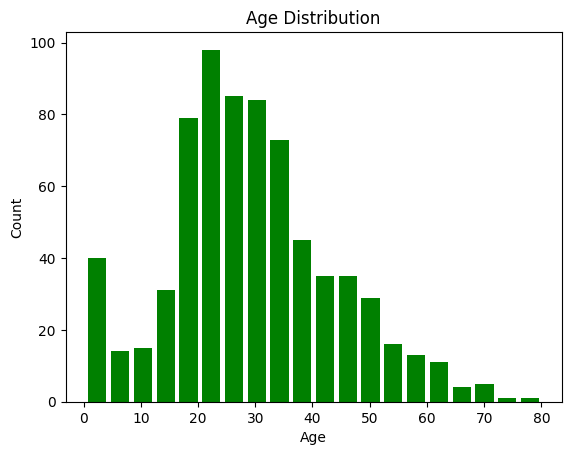

In [84]:
# Exercise 17: Histogram of age distribution
df["Age"].dropna().plot.hist(bins=20, color="green", rwidth=0.8)
# dropna() is removing missing values (NaN) from the data
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

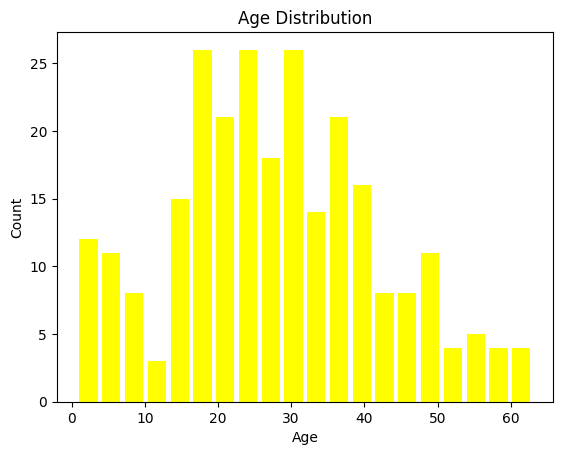

In [85]:
# Filter only female passengers
# female_ages = df.loc[df["Sex"] == "female", "Age"].dropna().plot.hist(bins=20, color="green")
female_ages = df.loc[df["Sex"] == "female", "Age"].dropna()
female_ages.plot.hist(bins=20, color="yellow", rwidth=0.8)
# dropna() is removing missing values (NaN) from the data
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

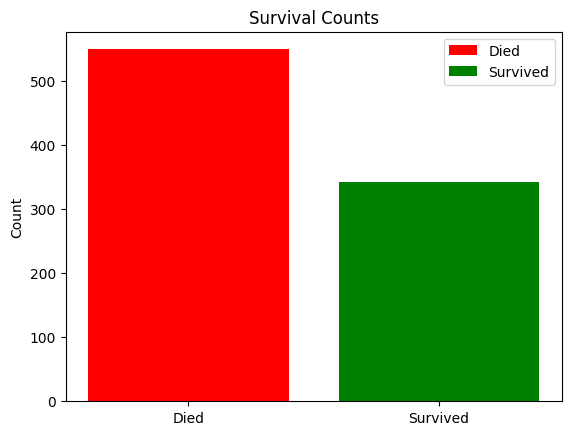

In [105]:
surv_counts = df["Survived"].value_counts()

# Value counts:
# The result is a pandas Series where
# The index = the unique values
# The values = the counts (how many times each appears)

# Plot bars individually with labels
plt.bar(0, surv_counts.loc[0], color="red", label="Died")
plt.bar(1, surv_counts.loc[1], color="green", label="Survived")

plt.title("Survival Counts")
plt.xticks([0, 1], ["Died", "Survived"])  # cleaner x-axis labels
plt.ylabel("Count")
plt.legend()

plt.show()

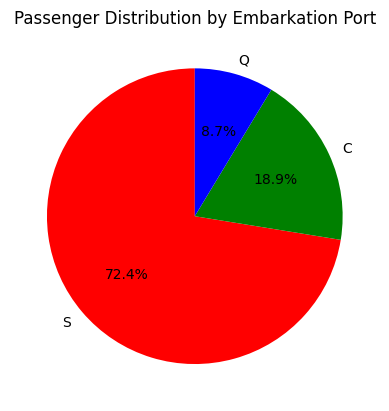

In [109]:
# Count passengers by embarkation port
embarked_counts = df["Embarked"].value_counts()

# Make a pie chart
plt.pie(
    embarked_counts,
    labels=embarked_counts.index,      # C = Cherbourg, Q = Queenstown, S = Southampton
    autopct='%1.1f%%',                 # Show percentages
    startangle=90,                     # Rotate for better layout
    colors=["red", "green", "blue"]
)

plt.title("Passenger Distribution by Embarkation Port")
plt.show()
